In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Mounted at /content/drive


# requirements

In [2]:
!pip install mpl_finance

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pickle

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# load data

In [ ]:
# interval = '30m'
interval = '1m'

date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

# basic_func

In [ ]:
def sync_check(df, second_df, third_df, fourth_df, fifth_df):

    #           supertrend          #
    ha_second_df = heikinashi(second_df)
    # ha_third_df = heikinashi(third_df)
    # print(ha_second_df.tail(10))
    # quit()

    second_df['minor_ST1_Up'], second_df['minor_ST1_Down'], second_df['minor_ST1_Trend'] = supertrend(second_df, 10, 2)
    second_df['minor_ST2_Up'], second_df['minor_ST2_Down'], second_df['minor_ST2_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2)
    second_df['minor_ST3_Up'], second_df['minor_ST3_Down'], second_df['minor_ST3_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2.5)
    # print(df.head(20))
    # quit()

    # startTime = time.time()

    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [i for i in range(-9, 0, 1)]),
                              columns=['minor_ST1_Up', 'minor_ST1_Down', 'minor_ST1_Trend'
                                  , 'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST2_Trend'
                                  , 'minor_ST3_Up', 'minor_ST3_Down', 'minor_ST3_Trend']))

    # print(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]].tail())
    # min_upper = np.minimum(df["minor_ST1_Up"], df["minor_ST2_Up"], df["minor_ST3_Up"])
    # max_lower = np.maximum(df["minor_ST1_Down"], df["minor_ST2_Down"], df["minor_ST3_Down"])
    min_upper = np.min(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1)
    max_lower = np.max(df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1)

    df['middle_line'] = (min_upper + max_lower) / 2

    print("supertrend phase done")


    #           lucid sar              #
    df['sar1'] = lucid_sar(df)

    second_df['sar'] = lucid_sar(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['sar2']))

    third_df['sar'] = lucid_sar(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['sar3']))

    fourth_df['sar'] = lucid_sar(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['sar4']))

    fifth_df['sar'] = lucid_sar(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['sar5']))

    # print(df[['sar1', 'sar2']].tail(20))
    # print(df[['minor_ST1_Up', 'minor_ST1_Trend']].tail(20))
    # quit()

    print("sar phase done")


    
    #           ichimoku            #
    df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))
    
    third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['senkou_a3', 'senkou_b3']))
    
    fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['senkou_a4', 'senkou_b4']))
    
    fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['senkou_a5', 'senkou_b5']))


    #           1-2. displacement           #
    # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)

    print("cloud phase done")

    
    #           macd            #
    df['macd_hist1'] = macd(df)
    
    second_df['macd_hist'] = macd(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['macd_hist2']))

    third_df['macd_hist'] = macd(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['macd_hist3']))

    fourth_df['macd_hist'] = macd(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['macd_hist4']))

    fifth_df['macd_hist'] = macd(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['macd_hist5']))


    print("macd phase done")


    #         trix        #
    df['trix1'] = trix_hist(df, 14, 1, 5)
    
    second_df['trix'] = trix_hist(second_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['trix2']))

    third_df['trix'] = trix_hist(third_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['trix3']))

    fourth_df['trix'] = trix_hist(fourth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['trix4']))

    fifth_df['trix'] = trix_hist(fifth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['trix5']))


    #       stochastic      #
    df['stoch'] = stoch(df, 5, 3, 3)
    print("stochastic phase done")

    #       fisher      #
    df['fisher30'] = fisher(df, 30)
    df['fisher60'] = fisher(df, 60)
    df['fisher120'] = fisher(df, 120)
    print("fisher phase done")

    #       cctbbo      #
    df['cctbbo'], _ = cct_bbo(df, 21, 13)
    print("cctbbo phase done")

    
    #          add for ep           #
    df['min_upper'] = min_upper
    df['max_lower'] = max_lower
  

    return df


# make & save res_df

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue
  
  # if 'btc'.upper() not in file_list[i]:
  #   continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-05-30'.upper() not in file_list[i]:
  if '2021-06-30'.upper() not in file_list[i]:
  # if '2021-07-03'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
    continue

  

  # if 'eth'.upper() in file_list[i]:
  # # if '2021-07-03'.upper() not in file_list[i]:
  # # if '2021-07-01'.upper() not in file_list[i]:
  #   continue

  for key in keys:  

    excel_name = key.replace(".xlsx", "_fisher_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)

    print(df.index[:2])
    print(second_df.index[:2])
    print(third_df.index[:2])
    print(fourth_df.index[:2])
    print(fifth_df.index[:2])

    res_df = sync_check(df, second_df, third_df, fourth_df, fifth_df)


    res_df.to_excel(excel_path)
    print("res_df saved succesfully !")

DatetimeIndex(['2021-06-01 00:00:59.999000', '2021-06-01 00:01:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:02:59.999000', '2021-05-31 00:05:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:04:59.999000', '2021-05-31 00:09:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:14:59.999000', '2021-05-31 00:29:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:29:59.999000', '2021-05-31 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
backing_i : -2
supertrend phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
sar phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
cloud phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
macd phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
stochastic phase done
fisher phase done
cctbbo phase done
res_df saved succesfully !
DatetimeIndex(['2021-06-01 00:00:59

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


backing_i : -2
supertrend phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
sar phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
cloud phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
macd phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
stochastic phase done
fisher phase done
cctbbo phase done
res_df saved succesfully !
DatetimeIndex(['2021-06-01 00:00:59.999000', '2021-06-01 00:01:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:02:59.999000', '2021-05-31 00:05:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:04:59.999000', '2021-05-31 00:09:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:14:59.999000', '2021-05-31 00:29:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-05-31 00:29:59.999000', '2021-05-31 00:59:59.999000'], dtype='datetime64[ns]', freq=None)
backing_i : -2
supertrend phase don

IndexError: ignored

# load res_df

In [ ]:
save_path = './candlestick_concated/res_df/'

# key = '2021-07-03 ETHUSDT.xlsx'
# key = '2021-07-01 ETHUSDT.xlsx'
key = '2021-07-01 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 BTCUSDT_backi2.xlsx'
# key = '2021-06-30 XRPUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi1.xlsx'
res_df = pd.read_excel(save_path + key, index_col=0)

# sync check

In [ ]:
plot_size = 300


#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols



#         do plot       #
plot_df = res_df.iloc[-plot_size:, input_cols]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

temp_ohlc = plot_df.values[:, :4]
index = np.arange(len(temp_ohlc))
candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

# print(plot_df.values[:, 4:])
plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)



plt.show()
# plt.draw()
plt.close()
# plt.pause(1e-3)

# pr check with strategy

### save sample res_dfs

In [ ]:
save_path = './candlestick_concated/res_df/'
res_df_files = os.listdir(save_path)

print(res_df_files)

res_df_dict = {}


sample_cnt = 15

for k_i, key in enumerate(res_df_files):
  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "eth".upper() not in key:
  #   continue

  if "_fisher_backi2" not in key:
    continue

  if sample_cnt == 15:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  res_df = pd.read_excel(save_path + key, index_col=0)  

  res_df_dict[key] = res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt < 0:
    break


['2021-07-03 ETHUSDT.xlsx_backup', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT_question.xlsx', '2021-06-30 ETHUSDT_backi1.xlsx', '2021-06-30 ETHUSDT_backi2.xlsx', '2021-07-01 ETHUSDT_backi1.xlsx', '2021-07-01 ETHUSDT_backi2.xlsx', '2021-06-30 BTCUSDT_backi2.xlsx', '2021-06-30 XRPUSDT_backi2.xlsx', '2021-06-30 LINKUSDT_backi2.xlsx', '2021-06-30 ADAUSDT_backi2.xlsx', '2021-06-30 ETCUSDT_backi2.xlsx', '2021-06-30 LTCUSDT_backi2.xlsx', '2021-06-30 EOSUSDT_backi2.xlsx', '2021-06-30 BCHUSDT_backi2.xlsx', '2021-06-30 XLMUSDT_backi2.xlsx', '2021-07-01 BTCUSDT_backi2.xlsx', '2021-07-01 BCHUSDT_backi2.xlsx', '2021-07-01 XRPUSDT_backi2.xlsx', '2021-07-01 EOSUSDT_backi2.xlsx', '2021-07-01 LTCUSDT_backi2.xlsx', '2021-07-01 ETCUSDT_backi2.xlsx', '2021-07-01 LINKUSDT_backi2.xlsx', '2021-07-01 XLMUSDT_backi2.xlsx', '2021-07-01 ADAUSDT_backi2.xlsx', '2021-06-30 ETHUSDTmacd5355_backi2.xlsx', '2021-06-30 BTCUSDTmacd5355_backi2.xlsx', '2021-06-30 BCHUSDTmacd5355_backi2.xlsx', '2021-06-30 XRPUSDTmacd535

## load res_df_dict

In [3]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-06-30 ETHUSDT_fisher_backi2_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print("res_df_dict loaded !")

res_df_dict loaded !


## basic strategy

In [ ]:
org_res_df = res_df.copy()

### shifting

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### lastest platform

2021-06-30 ETHUSDT_fisher_backi2.xlsx loaded !


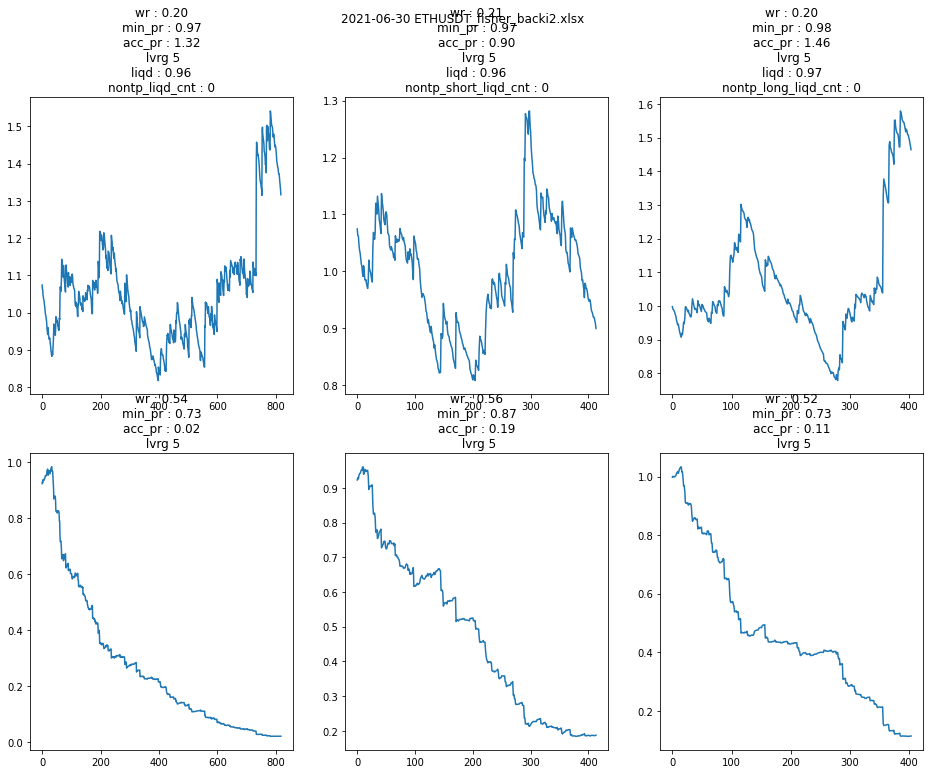

In [31]:
fee = 0.0004
lvrg = 5
# lvrg = 2

# gap = 0.0002
# gap = 0.0001
gap = 0.00005

p_qty_divider = 1.5


entry_type = 'limit'
# entry_type = 'market'
# ep_gap = 0.0005
ep_gap = 0.001
# ep_gap = 0.0001
# ep_gap = 0.00005

exit_type = 'market'
static_tp = 0

static_lvrg = 1
target_pct = 1.05
hl_lookback = 10

inversion = 0

if inversion:
  short_entry = [1, 2]
  long_entry = [-1, -2]
else:
  short_entry = [-1, -2]
  long_entry = [1, 2]

  
tp_cut_ratio = 0.7

fdist_thresh = 1

# ----------------- indicator ----------------- #
# ------- shift_size ------- #
cloud_shift_size = 1
sma_shift_size = 1
close_shift_size = 1


# ------- lb ------- #
cloud_lookback = 63
# cloud_lookback = 10

sma_lookback = 100
# sma_lookback = 100

sar_lookback = 5


# ------- indi. params ------- #
sma = 'sma4'

# sma_period = 250
sma_period = 100

fisher_upper = 1.5
fisher_lower = -1.5

stoch_upper = 63
stoch_lower = 37

senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']


for key, res_df in res_df_dict.items():

  # res_df = pd.read_excel(save_path + key, index_col=0)
  # fourth_df = pd.read_excel(date_path4 + key.replace("_4h1d_backi2", ""), index_col=0)

  print(key, "loaded !")
  # break

  # if 'btc'.upper() in key:
  # if 'qtum'.upper() in key:
  # if 'ada'.upper() in key:
  #   pass
  # else:
  #   continue

  for senkou_a, senkou_b in zip(senkoua_list, senkoub_list): 
  # for sma4_period in range(5, 30, 2):
  # for sma4_period in range(13, 14, 2):

    # print("sma4_period :", sma4_period)

    # senkou_a, senkou_b = 'senkou_a1', 'senkou_b1'

    
    upper_middle = (res_df['middle_line'] + res_df['min_upper']) / 2
    lower_middle = (res_df['middle_line'] + res_df['max_lower']) / 2

        
    # --------------- st ep --------------- #    
    upper_ep = res_df['middle_line']
    lower_ep = res_df['middle_line']

    # upper_ep = res_df['middle_line'] * (1 - gap)
    # lower_ep = res_df['middle_line'] * (1 + gap)
    
    # upper_ep = res_df['min_upper'] * (1 - gap)
    # lower_ep = res_df['max_lower'] * (1 + gap)

    # --------------- sar ep --------------- #    
    # upper_ep = res_df['sar1'].shift(1)
    # lower_ep = res_df['sar1'].shift(1)

    
    # print("under_top :", under_top)
    # break

    # sma = res_df['close'].rolling(300).mean()
    # res_df['sma'] = res_df['close'].rolling(sma_period).mean()  
    # # print(res_df['sma5'].tail())

    # if "sma4" in res_df.columns:
    #   res_df.drop("sma4", axis=1, inplace=True)

    # fourth_df['sma'] = fourth_df['close'].rolling(sma4_period).mean()
    # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, fourth_df, [-1]), columns=['sma4']))
    
    #       short = -1      #
    # --------------- st entry --------------- #
    # entry = np.where((res_df['close'].shift(1) <= upper_ep) & 
    #                       (res_df['high'] >= upper_ep)
    #                       , -1, 0) 
    entry = np.where((res_df['close'].shift(1) >= upper_ep) & 
                    # (lower_ep <= res_df['high']) & 
                    (res_df['close'] <= upper_ep)
                    , -1, 0) 

    # --------------- sar entry --------------- #
    # # entry = np.where((res_df['close'] <= res_df['sar2']) & 
    # #                   (res_df['close'].shift(1) > res_df['sar2'].shift(1))
    # #                   , -1, 0) 
    # entry = np.where((res_df['close'] <= res_df['sar2']) &
    #                  (res_df['low'].shift(1) > res_df['sar2'].shift(1)) &
    #                  (res_df['low'].shift(2) > res_df['sar2'].shift(2))
    #                   , -1, 0) 
    # entry = np.where((res_df['sar1'].shift(1) > res_df['low']) & 
    #                  (res_df['sar1'].shift(2) <= res_df['low'].shift(1))
    #                   , -1, 0) 
    
    # --------------- fisher entry --------------- #    
    # entry = np.where((res_df['fisher'].shift(1) >= res_df['fisher']) & 
    #                   (res_df['fisher'].shift(2) <= res_df['fisher']).shift(1) &
    #                   (res_df['fisher'].shift(1) >= fisher_upper)
    #                   , -1, 0) 
                      
    #       short = -2      #
    # entry = np.where((res_df['close'].shift(1) > upper_ep)
    #                   , -2, entry) 


    #       long = 1     #
    # --------------- st entry --------------- #    
    # entry = np.where((res_df['close'].shift(1) >= lower_ep) & 
    #                   (res_df['low'] <= lower_ep)
    #                   , 1, entry)   
    entry = np.where((res_df['close'].shift(1) <= lower_ep) & 
                      # (lower_ep <= res_df['high']) & 
                      (res_df['close'] >= lower_ep)
                      , 1, entry) 

    # --------------- sar entry --------------- #
    # # entry = np.where((res_df['close'] >= res_df['sar2']) & 
    # #                   (res_df['close'].shift(1) < res_df['sar2'].shift(1))
    # #                   , 1, entry)    

    # #       lb sar 이 high 보다 커야함      #     
    # entry = np.where((res_df['close'] >= res_df['sar2']) & 
    #                  (res_df['high'].shift(1) < res_df['sar2'].shift(1)) & 
    #                  (res_df['high'].shift(2) < res_df['sar2'].shift(2))
    #                   , 1, entry)
    # entry = np.where((res_df['sar1'].shift(1) < res_df['high']) &
    #                  (res_df['sar1'].shift(2) >= res_df['high'].shift(1))
    #                   , 1, entry) 
    
    # --------------- fisher entry --------------- #        
    #       long = 1     #
    # entry = np.where((res_df['fisher'].shift(1) <= res_df['fisher']) & 
    #                   (res_df['fisher'].shift(2) >= res_df['fisher']).shift(1) &
    #                   (res_df['fisher'].shift(1) <= fisher_lower)
    #                   , 1, entry) 

    #       long = 2     #
    #       close.shift(1) > ep | 2nd_middle line       #

    # entry = np.where((res_df['close'].shift(1) < lower_ep)
    #                   , 2, entry) 



    #       1-2. tp line = middle line 조금 이내         #    
    # --------------- st limit tp --------------- #
    short_tp = res_df['middle_line'] * (1 + gap)
    long_tp = res_df['middle_line'] * (1 - gap)
    
    # short_tp = lower_middle * (1 + gap)
    # long_tp = upper_middle * (1 - gap)
    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

    # short_tp = res_df['close'] - (res_df['middle_line'] - res_df['close']) * tp_cut_ratio
    # long_tp = res_df['close'] + (res_df['close'] - res_df['middle_line']) * tp_cut_ratio
    

    # --------------- sar limit tp --------------- #
    # short_tp = res_df['sar2']
    # long_tp = res_df['sar2']

    short_tp2 = res_df['middle_line'] * (1 + gap)
    long_tp2 = res_df['middle_line'] * (1 - gap)



    #       trading : 여기도 체결 결과에 대해 묘사함       #
    trade_list = []
    h_trade_list = []
    liqd_list = []
    short_liqd_list = []
    long_liqd_list = []

    nontp_liqd_list = []
    nontp_short_liqd_list = []
    nontp_long_liqd_list = []

    nontp_pr_list = []
    nontp_short_pr_list = []
    nontp_long_pr_list = []

    nontp_short_indexs = []
    nontp_long_indexs = []

    nontp_short_ep_list = []
    nontp_long_ep_list = []

    pr_list = []
    long_list = []
    short_list = []

    h_pr_list = []
    h_long_list = []
    h_short_list = []

    ep_tp_list = []
    h_ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):        

      if entry[i] in short_entry: 

        initial_i = i


        # -------------- ep scheduling -------------- #
        # if  (res_df['close'].iloc[i] <= lower_middle.iloc[i]):
        if abs((res_df['close'].iloc[i] - upper_ep.iloc[i]) / upper_ep.iloc[i]) < ep_gap:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue

        # -------------- distance protection -------------- #
        # tp_dist = (res_df['close'].iloc[i] - short_tp.iloc[i])
        # cut_dist = (res_df['middle_line'].iloc[i] - res_df['close'].iloc[i])
        # if tp_dist / cut_dist >= tp_cut_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue



        # -------------- sma const. -------------- #
        # if res_df['close'].iloc[i] <= res_df['sma'].iloc[i]:
        # if upper_ep.iloc[i] <= res_df['sma'].iloc[i - 1]:
        # under_sma = upper_ep <= res_df['sma'].shift(sma_shift_size)
        # if np.sum(under_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] >= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud lb const.-------------- #   
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        
        # cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
        # under_top = res_df['close'].shift(cloud_shift_size) <= cloud_top.shift(cloud_shift_size)

        # if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # # if np.sum(under_top.iloc[i - cloud_lookback:i]) != cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud color const.-------------- #
        #               1. senkou_a1 < senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #        
        # if i < cloud_lookback:        
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # # if res_df[senkou_a].shift(cloud_shift_size).iloc[i] <= res_df[senkou_b].shift(cloud_shift_size).iloc[i]:
        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] <= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   # np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue




        # -------------- st color const.-------------- #
        if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -1:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sar const. -------------- #
        if res_df['sar2'].iloc[i] > res_df['high'].iloc[i] and res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
        # if res_df['sar2'].iloc[i] > res_df['high'].iloc[i] and \
        #   res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue


        # -------------- limit waiting const. -------------- #
        # entry_done = False
        # for e_j in range(i + 1, len(res_df)):

        #   #             Todo            #
        #   #             1. ep 설정
        #   #             2. limit 대기 시간 설정
        #   if res_df['high'].iloc[e_j] >= upper_ep.iloc[initial_i]:
        #     entry_done = True
        #     # print("e_j :", e_j)
        #     break

        #   if res_df['close'].iloc[e_j] > res_df['middle_line'].iloc[e_j]:
        #     break

        # i = e_j
        # # print("i = e_j :", i)


        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        
        if entry_type is 'market':
          ep_list = [res_df['close'].iloc[initial_i]]
        else:
          ep_list = [upper_ep.iloc[initial_i]]

        if not static_lvrg:
          lvrg = target_pct / (res_df['high'].rolling(hl_lookback).max() / res_df['close'].iloc[initial_i] - 1)

        ep_idx_list = [initial_i]
        tp_list = []
        tp_idx_list = []

        remain_tp = 2
        hedge_cnt = 1

        h_ep, h_tp = None, None
        h_i, h_j = None, None
        
        trade_done = False
        
        for j in range(i + 1, len(res_df)):
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j


          # -------------- sub ep -------------- #
          # if res_df['high'].iloc[j - 1] <= res_df['sar2'].iloc[j - 1] and res_df['high'].iloc[j] > res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep < ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)

          
          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['high'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST3_Up'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j


          # -------------- sub tp -------------- #
          # if res_df['low'].iloc[j] <= short_tp2.iloc[j] and remain_tp == 2:
          # # if res_df['low'].iloc[j] <= short_tp2.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

          #   # trade_done = True # <-- sub tp 에는 trade_done 을 주지 않음 !
          #   remain_tp -= 1

          #   #         dynamic tp        #
          #   if short_tp2.iloc[j] != short_tp2.iloc[j - 1]:

          #     #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #     if res_df['open'].iloc[j] < short_tp2.iloc[j]:

          #       # tp = short_tp2.iloc[j]
          #       tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("d-open")

          #     #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          #     else:

          #       tp = short_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("d-short_tp2")

          #   #         static tp         #
          #   else:
              
          #     #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #     #   non_inversion 의 경우, short_tp2 가 가능함   #

          #     if res_df['open'].iloc[j] < short_tp2.iloc[j]:

          #       tp = short_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("s-short_tp2")

          #     #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          #     else:

          #       tp = short_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("s-short_tp2")   

          #   tp_list.append(tp)  


          # -------------- ultimate limit tp -------------- #
          #               1. by price line             #
          if exit_type != 'market':

            if res_df['low'].iloc[j] <= short_tp.iloc[tp_j]: # we use static tp now
            # if res_df['low'].iloc[j] <= short_tp.iloc[j]:
            # if res_df['low'].iloc[j] <= short_tp.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

              trade_done = True

              #         dynamic tp        #
              # if 0:
              if short_tp.iloc[j] != short_tp.iloc[j - 1] and not static_tp:

                #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                # if res_df['open'].iloc[j] < short_tp.iloc[initial_i]:
                if res_df['open'].iloc[j] < short_tp.iloc[j]:

                  # tp = short_tp.iloc[initial_i]
                  tp = res_df['open'].iloc[j]
                  tp_state_list.append("d-short_open")

                #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                else:

                  # tp = short_tp.iloc[initial_i]
                  tp = short_tp.iloc[j]
                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("d-short_tp")

              #         static tp         #
              else:
                
                #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                #   non_inversion 의 경우, short_tp 가 가능함   #              

                # if res_df['open'].iloc[j] < short_tp.iloc[initial_i]:
                if res_df['open'].iloc[j] < short_tp.iloc[tp_j]:

                  # tp = short_tp.iloc[initial_i]
                  tp = short_tp.iloc[tp_j]

                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("s-short_tp")

                #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                else:

                  # tp = short_tp.iloc[initial_i]
                  tp = short_tp.iloc[tp_j]

                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("s-short_tp")   

              tp_list.append(tp)     
              tp_idx_list.append(j)

          #           2. by signal        #
          else:

            # -------------- sar tp -------------- #
            # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
            #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

            #       inversion     #
            # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
            #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):

            # -------------- st tp -------------- #
            if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:       

            # if entry[j] == 1:
              
              tp = res_df['close'].iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("short close tp")
              trade_done = True

              tp_list.append(tp) 
              tp_idx_list.append(j)

                  
          # -------------- cut -------------- #
          # elif res_df['macd_hist3'].iloc[j] > 0:  #  macd cut
          # elif res_df['macd_hist3'].iloc[i] < 0 and res_df['macd_hist3'].iloc[j] > 0:
          # elif res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:    
          # elif res_df['close'].iloc[j] > res_df[sma].iloc[j]:

          # elif res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j]:
          # elif res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j] \
          #   or res_df['sar2'].iloc[j] <= res_df['high'].iloc[j]:
          
          # elif res_df['close'].iloc[j] > upper_middle.iloc[j]:

            # tp = res_df['close'].iloc[j]
            # # tp = res_df['open'].iloc[j]
            # tp_state_list.append("short close_cut")
            # trade_done = True

            # tp_list.append(tp) 
            # tp_idx_list.append(j)


          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)
          


          # -------------- append trade data -------------- #
          if trade_done:

            # if entry[initial_i] == -1:
            #   # ep = res_df['close'].iloc[initial_i]
            #   # ep = upper_ep.iloc[initial_i]
            #   # ep_list[0] = upper_ep.iloc[initial_i]
            #   pass
            # else:
            #   # ep = res_df['open'].iloc[initial_i]
            #   ep_list[0] = res_df['open'].iloc[initial_i]

              # ep = upper_ep.iloc[initial_i]
              # ep = res_df['close'].iloc[initial_i - 1]     

            # -------------------- partial tp -------------------- #
            #        1. len(tp_list) 에 대응하는 qty_list 를 만들어야함    #
            #        2. temp_pr_list 를 만들어 총합 + 1 을 pr_list 에 저장      #
            #        2-1. temp_pr = sum((ep / tp_list[i] - fee - 1) * qty_list[i])   #
            #        3. temp_pr_list 의 첫 tp 에는 r_qty 를 할당함        #
            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty * lvrg
              # temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)
              qty_list.append(temp_qty)

            # if len(temp_pr_list) == 1:
            #   print("qty_list :", qty_list)
            #   print("temp_pr_list :", temp_pr_list)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (sub_ep_ / tp - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_tp / h_ep - fee - 1) * lvrg  # hedge long
              temp_pr += hedge_pr
              h_j = j

            
            hh = max(res_df['high'].iloc[i:j + 1])
            short_liq = (ep_list[0] / hh - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              # ep_tp_list.append((ep, tp_list))  
              ep_tp_list.append((ep_list, tp_list))  
              # trade_list.append([initial_i, i, j])
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(short_liq)
              short_liqd_list.append(short_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              short_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_short_list.append(hedge_pr)

              i = j
              break

            else:
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(short_liq)
              nontp_short_liqd_list.append(short_liq)
              nontp_short_indexs.append(i)
              nontp_short_ep_list.append(ep_list[0])

              nontp_short_pr = (ep_list[0] / tp - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_short_pr)
              nontp_short_pr_list.append(nontp_short_pr)



      #                  long  phase                #
      elif entry[i] in long_entry: # inversion
      

        initial_i = i

        # -------------- ep scheduling -------------- #
        # if res_df['close'].iloc[i] >= upper_middle.iloc[i]:
        if abs((res_df['close'].iloc[i] - lower_ep.iloc[i]) / lower_ep.iloc[i]) < ep_gap:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue


        # -------------- distance protection -------------- #
        # tp_dist = (long_tp.iloc[i] - res_df['close'].iloc[i])
        # cut_dist = (res_df['close'].iloc[i] - res_df['middle_line'].iloc[i])
        # if tp_dist / cut_dist >= tp_cut_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sma const. -------------- #
        # if res_df['close'].iloc[i] > res_df['sma'].iloc[i]:
        # if lower_ep.iloc[i] >= res_df['sma'].iloc[i - 1]:
        # upper_sma = lower_ep >= res_df['sma'].shift(sma_shift_size)
        # if np.sum(upper_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] <= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud const. -------------- #     
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        
        # cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)
        # over_bottom = res_df['close'].shift(cloud_shift_size) >= cloud_bottom.shift(cloud_shift_size)

        # if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) != cloud_lookback:
        # # if np.sum(over_bottom.iloc[i - cloud_lookback:i]) != cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue  


        # -------------- cloud color const. -------------- #
        #               1. senkou_a1 >= senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #
        # if res_df[senkou_a].shift(cloud_shift_size).iloc[i] >= res_df[senkou_b].shift(cloud_shift_size).iloc[i]:

        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] >= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback \
        #   and np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback \
        #   and np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   # and np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback
        #   # and np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- st color const. -------------- #
        if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 1:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sar const. -------------- #
        if res_df['sar2'].iloc[i] < res_df['low'].iloc[i] and res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
        # if res_df['sar2'].iloc[i] < res_df['low'].iloc[i] and \
        #   res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
          pass
        else:
          i += 1
          if i >= len(res_df):
            break
          continue

        # -------------- limit waiting const. -------------- #
        # entry_done = False
        # for e_j in range(i + 1, len(res_df)):

        #   #             Todo            #
        #   #             1. ep 설정
        #   #             2. limit 대기 시간 설정
        #   if res_df['low'].iloc[e_j] <= upper_ep.iloc[initial_i]:
        #     entry_done = True
        #     break

        #   if res_df['close'].iloc[e_j] < res_df['middle_line'].iloc[e_j]:     
        #     break

        # i = e_j


        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        if entry_type is 'market':
          ep_list = [res_df['close'].iloc[initial_i]]
        else:
          ep_list = [lower_ep.iloc[initial_i]]

        if not static_lvrg:
          lvrg = target_pct / (res_df['close'].iloc[initial_i] / res_df['low'].rolling(hl_lookback).min() - 1)
          
        ep_idx_list = [initial_i]
        tp_list = []
        tp_idx_list = []

        remain_tp = 2
        hedge_cnt = 1

        h_ep, h_tp = None, None        
        h_i, h_j = None, None      

        trade_done = False

        for j in range(i + 1, len(res_df)):     
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j   

          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['low'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST3_Down'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j

          # -------------- sub ep -------------- #
          # if res_df['low'].iloc[j - 1] >= res_df['sar2'].iloc[j - 1] and res_df['low'].iloc[j] < res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep > ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)


          # -------------- sub tp --------------  #
          # if res_df['high'].iloc[j] >= long_tp2.iloc[j] and remain_tp == 2:

          #   # trade_done = True
          #   remain_tp -= 1

          #   #         dynamic tp        #
          #   if long_tp2.iloc[j] != long_tp2.iloc[j - 1]:

          #     #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #     if res_df['open'].iloc[j] >= long_tp2.iloc[j]:

          #       # tp = long_tp2.iloc[j]
          #       tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("d-open")

              
          #     #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          #     else:
                
          #       tp = long_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("d-long_tp2")

          #   #         static tp         #
          #   else:

          #     #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
          #     #   non_inversion 의 경우, short_tp 가 가능함   #

          #     if res_df['open'].iloc[j] >= long_tp2.iloc[j]:

          #       tp = long_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("s-long_tp2")

              
          #     #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
          #     else:
                
          #       tp = long_tp2.iloc[j]
          #       # tp = res_df['open'].iloc[j]
          #       # tp_state_list.append("s-long_tp2")       
            
          #   tp_list.append(tp)  


          # -------------- ultimate tp -------------- #
          #            1. by price line            #
          if exit_type != 'market':
            if res_df['high'].iloc[j] >= long_tp.iloc[tp_j]:
            # if res_df['high'].iloc[j] >= long_tp.iloc[j]:

              trade_done = True

              #         dynamic tp        #
              # if 0:
              if long_tp.iloc[j] != long_tp.iloc[j - 1] and not static_tp:

                #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                # if res_df['open'].iloc[j] >= long_tp.iloc[initial_i]:
                if res_df['open'].iloc[j] >= long_tp.iloc[j]:

                  # tp = long_tp.iloc[initial_i]
                  tp = res_df['open'].iloc[j]
                  tp_state_list.append("d-long_open")

                
                #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                else:
                  
                  # tp = long_tp.iloc[initial_i]
                  tp = long_tp.iloc[j]
                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("d-long_tp")

              #         static tp         #
              else:

                #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                #   non_inversion 의 경우, short_tp 가 가능함   #

                if res_df['open'].iloc[j] >= long_tp.iloc[tp_j]:
                # if res_df['open'].iloc[j] >= long_tp.iloc[initial_i]:

                  # tp = long_tp.iloc[initial_i]
                  tp = long_tp.iloc[tp_j]

                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("s-long_tp")

                
                #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                else:
                  
                  # tp = long_tp.iloc[initial_i]
                  tp = long_tp.iloc[tp_j]

                  # tp = res_df['open'].iloc[j]
                  tp_state_list.append("s-long_tp")         
              
              tp_list.append(tp)
              tp_idx_list.append(j)

          #           2. by signal        #
          else:

            # -------------- sar tp -------------- #
            # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
            #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
            
            #       inversion     #
            # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
            #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

            # -------------- st tp -------------- #
            if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:

            # if entry[j] == -1:
              
              tp = res_df['close'].iloc[j]
              # tp = res_df['open'].iloc[j]
              tp_state_list.append("long close tp")
              trade_done = True

              tp_list.append(tp) 
              tp_idx_list.append(j)



          # -------------- cut -------------- #
          # elif res_df['macd_hist3'].iloc[j] < 0:
          # # elif res_df['macd_hist3'].iloc[i] > 0 and res_df['macd_hist3'].iloc[j] < 0:
          # elif res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:
          # elif res_df['close'].iloc[j] < res_df[sma].iloc[j]:            
          # elif res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j]:
          # elif res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j] \
          #   or res_df['sar2'].iloc[j] >= res_df['low'].iloc[j]:

          # elif res_df['close'].iloc[j] < lower_middle.iloc[j]:

          #   tp = res_df['close'].iloc[j]
          #   # tp = res_df['open'].iloc[j]
          #   tp_state_list.append("long close_cut")
          #   trade_done = True

          #   tp_list.append(tp)
          #   tp_idx_list.append(j)

          
          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)


          if trade_done:

            # if entry[initial_i] == 1:
            #   # ep = res_df['close'].iloc[initial_i]
            #   # ep_list[0] = lower_ep.iloc[initial_i]
            #   pass
            # else:
            #   # ep = lower_ep.iloc[i]
            #   ep_list[0] = res_df['open'].iloc[initial_i]
            #   # ep = res_df['close'].iloc[initial_i - 1]

            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              # temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty
              temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty * lvrg
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (tp / sub_ep_ - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_ep / h_tp - fee - 1) * lvrg  # hedge short
              temp_pr += hedge_pr
              h_j = j


            ll = min(res_df['low'].iloc[i:j + 1])
            long_liq = (ll / ep_list[0] - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              ep_tp_list.append((ep_list, tp_list))
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(long_liq)
              long_liqd_list.append(long_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              long_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_long_list.append(hedge_pr)                    

              i = j
              break
            
            else:
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(long_liq)
              nontp_long_liqd_list.append(long_liq)
              nontp_long_indexs.append(i)
              nontp_long_ep_list.append(ep_list[0])
              
              nontp_long_pr = (tp / ep_list[0] - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_long_pr)
              nontp_long_pr_list.append(nontp_long_pr)


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    try:
      plt.figure(figsize=(16, 12))
      plt.suptitle(key)

      np_pr = np.array(pr_list)
      # np_pr = (np.array(pr_list) - 1) * lvrg + 1

      total_pr = np.cumprod(np_pr)
      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

      # plt.subplot(121)
      plt.subplot(231)
      plt.plot(total_pr)
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_liqd_cnt : %s\nnontp_liqd : %.2f\nontp_liqd_pr : %.2f" 
                  % (wr, np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list)))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_liqd_cnt : %s" 
                  % (wr, np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), len(nontp_liqd_list)))
      # plt.show()

      #         short only      #
      np_short_pr = np.array(short_list)

      total_short_pr = np.cumprod(np_short_pr)
      short_wr = len(np_short_pr[np_short_pr > 1]) / len(np_short_pr[np_short_pr != 1])
      
      plt.subplot(232)
      plt.plot(total_short_pr)
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_short_liqd_cnt : %s\nnontp_short_liqd : %.2f\nontp_short_liqd_pr : %.2f\nmax_nontp_short_term : %s"  
                  % (short_wr, np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), 
                     len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_short_liqd_cnt : %s"  
                  % (short_wr, np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), len(nontp_short_liqd_list)))

      #         long only      #
      np_long_pr = np.array(long_list)
      # np_long_pr = (np.array(long_list) - 1) * lvrg + 1

      total_long_pr = np.cumprod(np_long_pr)
      long_wr = len(np_long_pr[np_long_pr > 1]) / len(np_long_pr[np_long_pr != 1])
      
      plt.subplot(233)
      plt.plot(total_long_pr)
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_long_liqd_cnt : %s\nnontp_long_liqd : %.2f\nontp_long_liqd_pr : %.2f\nmax_nontp_long_term : %s"   
                  % (long_wr, np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), 
                     len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_long_liqd_cnt : %s"   
                  % (long_wr, np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), len(nontp_long_liqd_list)))


      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      # plt.subplot(122)
      plt.subplot(234)
      plt.plot(rev_total_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))

      #         short       #
      # rev_np_short_pr = 1 / (np.array(short_list) + fee) - fee
      rev_np_short_pr = (1 / ((np.array(short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_short_pr = (1 / (np.array(short_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_short_pr = np.cumprod(rev_np_short_pr)
      rev_short_wr = len(rev_np_short_pr[rev_np_short_pr > 1]) / len(rev_np_short_pr[rev_np_short_pr != 1])

      # plt.subplot(122)
      plt.subplot(235)
      plt.plot(rev_total_short_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_short_wr, np.min(rev_np_short_pr), rev_total_short_pr[-1], lvrg))

      #         long       #
      # rev_np_long_pr = 1 / (np.array(long_list) + fee) - fee
      rev_np_long_pr = (1 / ((np.array(long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
          
      rev_total_long_pr = np.cumprod(rev_np_long_pr)
      rev_long_wr = len(rev_np_long_pr[rev_np_long_pr > 1]) / len(rev_np_long_pr[rev_np_long_pr != 1])

      # plt.subplot(122)
      plt.subplot(236)
      plt.plot(rev_total_long_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_long_wr, np.min(rev_np_long_pr), rev_total_long_pr[-1], lvrg))
      
      plt.show()

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        # plt.subplot(121)
        plt.subplot(231)
        plt.plot(h_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], lvrg))
        # plt.show()

        #         short only      #
        h_np_short_pr = np.array(h_short_list)

        h_total_short_pr = np.cumprod(h_np_short_pr)
        h_short_wr = len(h_np_short_pr[h_np_short_pr > 1]) / len(h_np_short_pr[h_np_short_pr != 1])
        
        plt.subplot(232)
        plt.plot(h_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_short_wr, np.min(h_np_short_pr), h_total_short_pr[-1], lvrg))

        #         long only      #
        h_np_long_pr = np.array(h_long_list)

        h_total_long_pr = np.cumprod(h_np_long_pr)
        h_long_wr = len(h_np_long_pr[h_np_long_pr > 1]) / len(h_np_long_pr[h_np_long_pr != 1])
        
        plt.subplot(233)
        plt.plot(h_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_long_wr, np.min(h_np_long_pr), h_total_long_pr[-1], lvrg))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(234)
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], lvrg))

        #         short       #
        # h_rev_np_short_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_np_short_pr =  (1 / ((np.array(h_short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
           
        h_rev_total_short_pr = np.cumprod(h_rev_np_short_pr)
        h_rev_short_wr = len(h_rev_np_short_pr[h_rev_np_short_pr > 1]) / len(h_rev_np_short_pr[h_rev_np_short_pr != 1])

        # plt.subplot(122)
        plt.subplot(235)
        plt.plot(h_rev_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_short_wr, np.min(h_rev_np_short_pr), h_rev_total_short_pr[-1], lvrg))

        #         long       #
        # h_rev_np_long_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_np_short_pr =  (1 / ((np.array(h_long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
            
        h_rev_total_long_pr = np.cumprod(h_rev_np_long_pr)
        h_rev_long_wr = len(h_rev_np_long_pr[h_rev_np_long_pr > 1]) / len(h_rev_np_long_pr[h_rev_np_long_pr != 1])

        # plt.subplot(122)
        plt.subplot(236)
        plt.plot(h_rev_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_long_wr, np.min(h_rev_np_long_pr), h_rev_total_long_pr[-1], lvrg))
        
        plt.show()
          
    except Exception as e:
      print('error in pr plot :', e)   
    

    print()

    break # indi. loop
  break # pair loop

### nontp survey

##### term & liqd

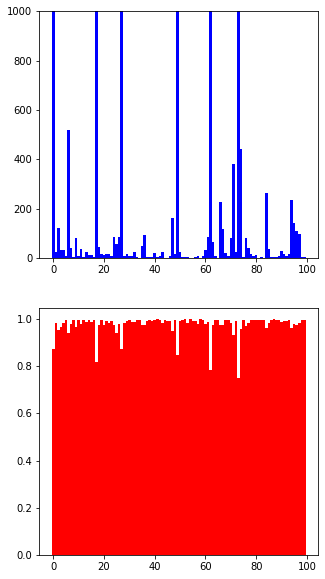

In [ ]:
# print(nontp_long_indexs)

plot_size = 100

for s_i in range(plot_size, len(trade_list), plot_size):

  slice_trade_list = trade_list[s_i - plot_size:s_i]
  slice_liqd_list = liqd_list[s_i - plot_size:s_i]

  # print(len(slice_trade_list))
  np_trade = np.array(slice_trade_list)
  trade_term = np_trade[:, [2]] - np_trade[:, [1]]

  plt.figure(figsize=(5, 10))
  plt.subplot(211)
  plt.bar(np.arange(len(trade_term)), trade_term.reshape(-1,), width=1, color='b')

  # plt.plot(trade_term.reshape(-1,))
  plt.ylim(0, 1000)
  # plt.show()
  # print()

  plt.subplot(212)
  # print(len(liqd_list))
  # plt.bar(np.arange(len(liqd_list)), liqd_list)
  plt.bar(np.arange(len(slice_liqd_list)), np.array(slice_liqd_list), width=1, color='r')
  # plt.plot(slice_liqd_list)
  plt.show()

print()

##### check nontp index

In [ ]:
# np_nontp_short_indexs = np.array(nontp_short_indexs)
# np_nontp_long_indexs = np.array(nontp_long_indexs)

# short_til_term = len(res_df) - np_nontp_short_indexs
# long_til_term = len(res_df) - np_nontp_long_indexs

max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

print(max_nontp_long_term)

32747


# traded section plot

## plot with off-color st with dash

### plot all indicator (stepline ver.)

In [32]:
prev_plotsize = 50
post_plotsize = 10

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma', 'sma4']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




# for t_i, (initial_i, i, j) in enumerate(trade_list):
for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    # continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_lower_ep = lower_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.plot(plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
  #   alpha -= 0.2
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize - (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
  plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i]))
  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  plt.subplot(gs[1])
  alpha = 1
  for macd in macd_list:
    plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


Output hidden; open in https://colab.research.google.com to view.

### plot nontp case

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

# hedge = True
# hedge = False

short_ver = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list 
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


if short_ver:
  nontp_indexs = nontp_short_indexs
  nontp_liqd_list = nontp_short_liqd_list
  nontp_pr_list = nontp_short_pr_list
  nontp_ep = nontp_short_ep_list
else:
  nontp_indexs = nontp_long_indexs
  nontp_liqd_list = nontp_long_liqd_list
  nontp_pr_list = nontp_long_pr_list
  nontp_ep = nontp_long_ep_list


for t_i, i in enumerate(nontp_indexs):

  j = len(res_df) - 1

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  if i != initial_i:
    plt.axvline(prev_plotsize - (i - initial_i), alpha=0.5, linestyle='--')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(nontp_ep[t_i], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline    

  #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - i), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> liqd : %.2f\npr : %.2f" % (i, j, nontp_liqd_list[t_i], nontp_pr_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(313)
  plt.subplot(gs[1])
  alpha = 1
  for stoch in stoch_list:
    plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(50, linestyle='--')
  plt.axhline(stoch_upper, linestyle='--')
  plt.axhline(stoch_lower, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


Output hidden; open in https://colab.research.google.com to view.

### specific plot v1

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

if inversion:
  plot_pr_list = rev_np_pr
else:
  plot_pr_list = np_pr



#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
# ichimoku_cols = [22, 23]  # 20 ~ 29
ichimoku_cols2 = [22, 23]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i != 257:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue


  if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  fig = plt.figure(figsize=(12, 16))
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  ax = fig.add_subplot(211)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle
  
  plt.plot(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.plot(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  # plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.plot(plot_upper_middle.values, alpha=1, linestyle='--')  # middle
  plt.plot(plot_lower_middle.values, alpha=1, linestyle='--')  # middle

  plt.plot(plot_short_tp.values, alpha=1, linestyle=':')  # tp
  plt.plot(plot_long_tp.values, alpha=1, linestyle=':')  # tp

  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14], # ichimoku
                    where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)  
  
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17], # ichimoku
                    where=plot_df.values[:, 16] >= plot_df.values[:, 17], facecolor='g', alpha=0.3) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17],
                    where=plot_df.values[:, 16] <= plot_df.values[:, 17], facecolor='r', alpha=0.3)

  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(ep_tp_list[t_i][1], linestyle='-')  # tp line axhline
  plt.title("%s ~ %s -> %.5f\n %s" % (i, j, plot_pr_list[t_i], tp_state_list[t_i]))


  plt.subplot(212)
  plt.plot(plot_df.values[:, [15]], 'g', alpha=1)  # middle
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(0, linestyle='--')

  plt.show()
  # plt.draw()
  plt.close()
  print()



KeyError: ignored

### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


## none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()